In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [13]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [19]:
'''
총 5개의 하위 라이브러리  
flowers_photos/  
  daisy/  
  dandelion/  
  roses/  
  sunflowers/  
  tulips/  
'''

'\n총 5개의 하위 라이브러리  \nflowers_photos/  \n  daisy/  \n  dandelion/  \n  roses/  \n  sunflowers/  \n  tulips/  \n'

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


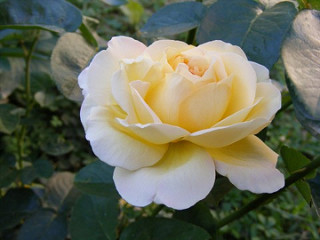

In [17]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

## keras.preprocessing을 사용하여 로드하기

In [20]:
batch_size = 32
img_height = 180
img_width = 180

In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Visualization

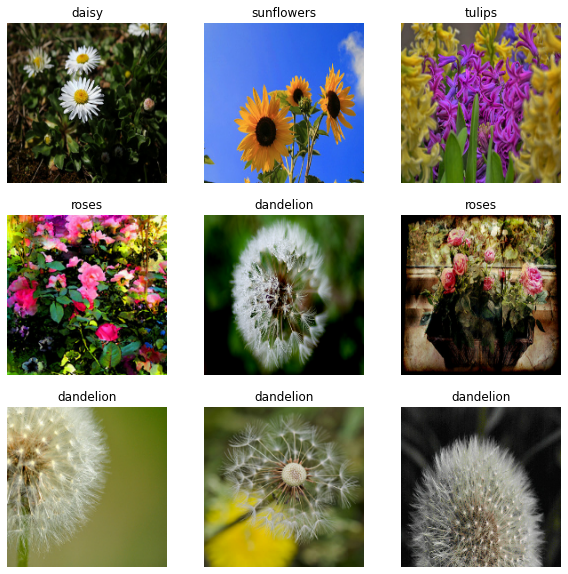

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):  # images, labels : 32개(batch_size)의 이미지 파일, 클래스 (클래스는 숫자로 제시)  
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])  # labels[i] : i번째 데이터의 클래스 숫자
        plt.axis("off")

In [39]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


## Data Normalization

Rescaling 레이어를 사용하여 값이 [0, 1]에 있도록 표준화

In [41]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [42]:
normalized_ds = train_ds.map(lambda x, y : (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


<MapDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 2, 1, 1, 4, 4, 4, 4, 4, 3, 1, 3, 3, 3, 1, 2, 4, 1, 3, 0, 1, 3,
       0, 0, 2, 2, 4, 3, 2, 4, 3, 1], dtype=int32)>